<a href="https://colab.research.google.com/github/deepsignal/Spatial-Processing/blob/master/ver2_mapflow3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Ver 2 of mapflow 3_3 derived from copy2 of mapflow 3_3. This version is to have combos, selected nonsequentially. This represents a big departure, as combo naming and management is more complex
# Observation was the error function flattens out, but a lone mac remains undetected. So we can get much better performance by adding the lone mac rather than extending to a much larger combo set.



# 3_3 : adding the consecutive token removal  .... will be frozen for reflecting the current figure in comcast presentation
# 3_2 : configuring to plot only the combos that have been assigned by the assigner.

# plot some custom figures from 3.0 notebook, with point removal and stuff.
# Stremaline the custom assignment, after combo number inference, to try different distance mechanisms.

In [ ]:

# End to end flow, with matching and cartezianization from assigned file data
# Assigned file to combos and links
# User above to create an assignment cost function graph
# Find the floor of the graph to select the number of combos
# Use combos to create a data stream, to be fed for counting function
# Use counting output, and assignment labels for actual plotted points

In [ ]:
! pip install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 957.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 907.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavio

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import json
import numpy as np
from collections import OrderedDict

np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(precision=2)


#copied_path = '/content/gdrive/MyDrive/combo_files/nlp_format_adriandevice.json'
#copied_path = '/content/gdrive/MyDrive/5db8f4ebbca6fe4cba7f6543_20221112_163300_20221112_164300_reassign.json' # taj single walkthru 5 min
#copied_path = '/content/gdrive/MyDrive/dt_demoday_live_data_reassign.json' # DT_demo Steven Uhoto
#copied_path = '/content/gdrive/MyDrive/6452b546a0f1e8000a2932f3_20230528_000000_20230528_235959_reassign.json' # Wills comcast test 5+ devices-fullday 28
#copied_path = '/content/gdrive/MyDrive/6452b546a0f1e8000a2932f3_20230527_000000_20230527_235959_reassign.json' # Wills comcast test 5+ devices-fullday 27
#copied_path = '/content/gdrive/MyDrive/6452b546a0f1e8000a2932f3_20230519_000000_20230519_235959_reassign.json' # Wills comcast test 5+ devices-fullday 19
#copied_path = '/content/gdrive/MyDrive/6452b546a0f1e8000a2932f3_20230518_000000_20230518_235959_reassign.json' # Wills comcast test 5+ devices-fullday 18
#copied_path = '/content/gdrive/MyDrive/6452b546a0f1e8000a2932f3_20230517_000000_20230517_235959_reassign.json' # Wills comcast test 5+ devices-fullday 17
#copied_path = '/content/gdrive/MyDrive/taj_fullday_5db8f4ebbca6fe4cba7f6543_20221106_000000_20221106_230000_reassign.json'    # taj full dat
# +++ Adding another user
#copied_path = '/content/gdrive/MyDrive/61b0f2ef11a28b18306f3cee_20230609_000000_20230609_235959_reassign.json' # Matts 06_09 data
#copied_path = '/content/gdrive/MyDrive/61b0f2ef11a28b18306f3cee_20230610_000000_20230610_235959_reassign.json' # Matts 06_09 data
#++ Adding live data test
#copied_path = '/content/gdrive/MyDrive/live_data_26_jun_reassign.json' # 26th June Test

# ++ Comcast Karanvir Device
#copied_path = '/content/gdrive/MyDrive/63c08b9a6909a42e6ac996c0_20231128_000000_20231128_235959_reassign.json' # Karanvir 28 whole day

# ++ Mercator testing Start with Ryan ++
#copied_path = '/content/gdrive/MyDrive/6266d9ab4a4a0b000aee1e79_20240116_111500_20240116_113000_reassign.json' # Ryans Mercator test1 (probably dud)
#copied_path = '/content/gdrive/MyDrive/6266d9ab4a4a0b000aee1e79_20240116_152300_20240116_153800_reassign.json' # Ryans Mercator test 2

# ++ Mercator testing Steve ++
#copied_path = '/content/gdrive/MyDrive/5f10eed9f0e15f5db67cc339_20240117_000000_20240117_235959_reassign.json' # Steve's mercator1
#copied_path = '/content/gdrive/MyDrive/datasets/5f10eed9f0e15f5db67cc339_20240119_000000_20240119_235959_reassign.json' # Steve's mercator2
#copied_path = '/content/gdrive/MyDrive/datasets/5f10eed9f0e15f5db67cc339_20240120_000000_20240120_235959_reassign.json' # Steve's mercator3 - Saturday
#copied_path = '/content/gdrive/MyDrive/datasets/5f10eed9f0e15f5db67cc339_20240121_000000_20240121_235959_reassign.json' # Steve's mercator4 - Sunday
#copied_path = '/content/gdrive/MyDrive/datasets/5f10eed9f0e15f5db67cc339_20240122_000000_20240122_235959_reassign.json' # Steve's Monday
#copied_path = '/content/gdrive/MyDrive/datasets/5f10eed9f0e15f5db67cc339_20240123_000000_20240123_235959_reassign.json' # Steve's Tuesday , not working, topology shifted, but what a plot !!!!

# ++ Mercator testing Saibal ++
copied_path = '/content/gdrive/MyDrive/datasets/5eebb03ed699b50d828117f6_20240224_000000_20240224_235959_reassign.json'   # Saturday
#copied_path = '/content/gdrive/MyDrive/datasets/5eebb03ed699b50d828117f6_20240225_000000_20240225_235959_reassign.json'   # Sunday
#copied_path = '/content/gdrive/MyDrive/datasets/5eebb03ed699b50d828117f6_20240226_000000_20240226_235959_reassign.json'   # Monday
#copied_path = '/content/gdrive/MyDrive/datasets/5eebb03ed699b50d828117f6_20240227_000000_20240227_235959_reassign.json'   # Tuesday
#copied_path = '/content/gdrive/MyDrive/datasets/5eebb03ed699b50d828117f6_20240228_000000_20240228_235959_reassign.json'    # Wednesday
#copied_path = '/content/gdrive/MyDrive/datasets/5eebb03ed699b50d828117f6_20240229_000000_20240229_235959_reassign.json'    # Thursday
#copied_path = '/content/gdrive/MyDrive/datasets/5eebb03ed699b50d828117f6_20240301_000000_20240301_235959_reassign.json'    # Friday
#copied_path = '/content/gdrive/MyDrive/datasets/5eebb03ed699b50d828117f6_20240302_000000_20240302_235959_reassign.json'    # Saturday
#copied_path = '/content/gdrive/MyDrive/datasets/5eebb03ed699b50d828117f6_20240303_000000_20240303_235959_reassign.json'    # Sunday

with open(copied_path) as f:
  compress_data = json.load(f)

#print(len(compress_data["max_topology"]))
# 21

In [ ]:
compress_data['topo1'].keys()

dict_keys(['topology', 'combo_occurrence', 'transition_info', 'combo_sequence', 'time_sequence', 'rssi_sequence', 'lraw_sequence', 'mconf_sequence', 'mkai_sequence', 'msad_sequence', 'snr_sequence', 'throughput_sequence'])

In [ ]:
compress_data['topo1']['rssi_sequence'].keys()

dict_keys(['4C72400754.0007a61e018d', '4C72400754.08911552672b', '4C72400754.28ee52a708ca', '4C72400754.28ee52a70cae', '4C72400754.68ff7b817f73', '4C72400754.786c842c48e9', '4C72400754.786c845a3054', '4C72400754.90f82e864305'])

In [ ]:
#rssi1 = (compress_data['topo1']['rssi_sequence']['4Y7D3003B6.1aa6f745a146'])
#rssi1 = [int(x) for x in rssi1]
#print(np.mean(rssi1))

#rssi1 = (compress_data['topo1']['rssi_sequence']['4Y7D3003B6.a47733af04bf'])
#rssi1 = [int(x) for x in rssi1]
#print(np.mean(rssi1))


links2rssi = {}
# printing RSSIs of all the links included in the dataset
for link in compress_data['topo1']['rssi_sequence'].keys():
  valr = compress_data['topo1']['rssi_sequence'][link]
  try:
    rssi = [int(x) for x in valr]
    print(link,' has an average RSSI of ', np.round(np.mean(rssi)))
    links2rssi[link]=np.mean(rssi)
  except:
    print('Cant find rssi for link',link)



#np.max(compress_data['topo1']['rssi_sequence']['4Y7D3003B6.7c6166e32f62'])

#snr_seq = (compress_data['topo1']['snr_sequence']['D4E2CB9D4F1C.f0ef863b489d'])

#import matplotlib.pyplot as plt
#plt.figure(figsize=(15,5))
#plt.xticks(np.arange(0, 32, 1))
#plt.plot(snr_seq)

4C72400754.0007a61e018d  has an average RSSI of  -72.0
4C72400754.08911552672b  has an average RSSI of  -71.0
4C72400754.28ee52a708ca  has an average RSSI of  -57.0
4C72400754.28ee52a70cae  has an average RSSI of  -48.0
4C72400754.68ff7b817f73  has an average RSSI of  -58.0
4C72400754.786c842c48e9  has an average RSSI of  -66.0
4C72400754.786c845a3054  has an average RSSI of  -64.0
4C72400754.90f82e864305  has an average RSSI of  -69.0


In [ ]:
combo_dict = {} # OrderedDict()
for i in range(25):
  k = compress_data['topo1']['transition_info']['Combo'+str(i+1)] #['links']
  #print('Combo'+str(i+1)+'::',k['links'], '<<<>>>', k['location'])
  print('Combo'+str(i+1)+'::',k['links'])
  combo_dict['Combo'+str(i+1)] = k['links']

Combo1:: ['4C72400754.08911552672b']
Combo2:: ['4C72400754.0007a61e018d']
Combo3:: ['4C72400754.28ee52a708ca']
Combo4:: ['4C72400754.68ff7b817f73']
Combo5:: ['4C72400754.08911552672b', '4C72400754.786c842c48e9']
Combo6:: ['4C72400754.90f82e864305']
Combo7:: ['4C72400754.786c845a3054']
Combo8:: ['4C72400754.0007a61e018d', '4C72400754.08911552672b']
Combo9:: ['4C72400754.28ee52a70cae']
Combo10:: ['4C72400754.08911552672b', '4C72400754.786c845a3054']
Combo11:: ['4C72400754.0007a61e018d', '4C72400754.08911552672b', '4C72400754.28ee52a708ca', '4C72400754.28ee52a70cae', '4C72400754.68ff7b817f73', '4C72400754.786c842c48e9', '4C72400754.786c845a3054', '4C72400754.90f82e864305']
Combo12:: ['4C72400754.786c842c48e9']
Combo13:: ['4C72400754.08911552672b', '4C72400754.28ee52a708ca']
Combo14:: ['4C72400754.0007a61e018d', '4C72400754.786c845a3054']
Combo15:: ['4C72400754.28ee52a708ca', '4C72400754.28ee52a70cae']
Combo16:: ['4C72400754.08911552672b', '4C72400754.68ff7b817f73', '4C72400754.786c842c48e

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
from ortools.linear_solver import pywraplp

import sys
sys.path.append('/content/gdrive/My Drive')

from MatchingTools import match_devices

In [ ]:
def adapter(combos, links):
    """
    combos: Dictionary mapping combo name to list of names of active links
    links: list of link names
    """

    # construct cluster center tokens
    linkname2linkidx = {}
    for i, l in enumerate(links):
        linkname2linkidx[l] = i

    cluster_centers = [] # when populated, should have the same length as combos
    for _, active_links in combos.items():
        active_idxs = [linkname2linkidx[l] for l in active_links]
        # construct token from active_idxs. Token should be the same length as links
        center_token = tuple(1 if i in active_idxs else 0 for i in range(len(links)))
        cluster_centers.append(center_token)

    return cluster_centers


In [ ]:
links = compress_data['topo1']['topology']
combos = combo_dict


centers = adapter(combo_dict, links)
match_devices(centers, links)
#print(centers)

Total cost = 0.0
Device 4C72400754 assigned to cluster center (1, 1, 1, 1, 1, 1, 1, 1). Cost: 0.0
Device 0007a61e018d assigned to cluster center (1, 0, 0, 0, 0, 0, 0, 0). Cost: 0.0
Device 08911552672b assigned to cluster center (0, 1, 0, 0, 0, 0, 0, 0). Cost: 0.0
Device 28ee52a708ca assigned to cluster center (0, 0, 1, 0, 0, 0, 0, 0). Cost: 0.0
Device 28ee52a70cae assigned to cluster center (0, 0, 0, 1, 0, 0, 0, 0). Cost: 0.0
Device 68ff7b817f73 assigned to cluster center (0, 0, 0, 0, 1, 0, 0, 0). Cost: 0.0
Device 786c842c48e9 assigned to cluster center (0, 0, 0, 0, 0, 1, 0, 0). Cost: 0.0
Device 786c845a3054 assigned to cluster center (0, 0, 0, 0, 0, 0, 1, 0). Cost: 0.0
Device 90f82e864305 assigned to cluster center (0, 0, 0, 0, 0, 0, 0, 1). Cost: 0.0



('Total cost = 0.0\nDevice 4C72400754 assigned to cluster center (1, 1, 1, 1, 1, 1, 1, 1). Cost: 0.0\nDevice 0007a61e018d assigned to cluster center (1, 0, 0, 0, 0, 0, 0, 0). Cost: 0.0\nDevice 08911552672b assigned to cluster center (0, 1, 0, 0, 0, 0, 0, 0). Cost: 0.0\nDevice 28ee52a708ca assigned to cluster center (0, 0, 1, 0, 0, 0, 0, 0). Cost: 0.0\nDevice 28ee52a70cae assigned to cluster center (0, 0, 0, 1, 0, 0, 0, 0). Cost: 0.0\nDevice 68ff7b817f73 assigned to cluster center (0, 0, 0, 0, 1, 0, 0, 0). Cost: 0.0\nDevice 786c842c48e9 assigned to cluster center (0, 0, 0, 0, 0, 1, 0, 0). Cost: 0.0\nDevice 786c845a3054 assigned to cluster center (0, 0, 0, 0, 0, 0, 1, 0). Cost: 0.0\nDevice 90f82e864305 assigned to cluster center (0, 0, 0, 0, 0, 0, 0, 1). Cost: 0.0\n',
 0.0,
 [(0, 10), (1, 1), (2, 0), (3, 2), (4, 8), (5, 3), (6, 11), (7, 6), (8, 5)],
 ['4C72400754',
  '0007a61e018d',
  '08911552672b',
  '28ee52a708ca',
  '28ee52a70cae',
  '68ff7b817f73',
  '786c842c48e9',
  '786c845a3054'

In [ ]:
#combo_dict

In [ ]:
from contextlib import redirect_stdout
import io

In [ ]:
# iterate the number of combos to take in, and plot the matching score over # of combos
# select the settling point where the cost has flattened

score = []
for k in range(2,25):
  combos_prep = {'Combo'+str(i):combos['Combo'+str(i)] for i in range(1,k)}
  #print(combos_prep)
  centers = adapter(combos_prep, links)
  # r->results, c->costs, a->assignments, d->devices
  #test_matching(centers, links)
  with redirect_stdout(io.StringIO()) as f:
    r,c,a,d = match_devices(centers, links)
    score.append(c)

In [ ]:
# CNC: combo number corner ... Find innitial zeros. Start from when they end. keep moving, until three consecutive same
# costs are encountered.
stop_cnc = 0
floor_th = 2
combo_result = 0
for i in range(20):
  if score[i]==0:
    pass
  else:
    if score[i-1]==score[i]:
      stop_cnc = stop_cnc + 1
  if stop_cnc == floor_th :
    print(str(i-(floor_th))+'  is the corner of the score card')
    combo_result = i-(floor_th)
    stop_cnc = 0
    break
    #stop_cnc = 0
  #if i>10 and score[i]==0:
  #  combo_result = i-1
  #  print(str(combo_result)+ 'is the new corner'  )
  #  exit


corner = i-floor_th

print('Corner found is : --', corner)

Corner found is : -- 17


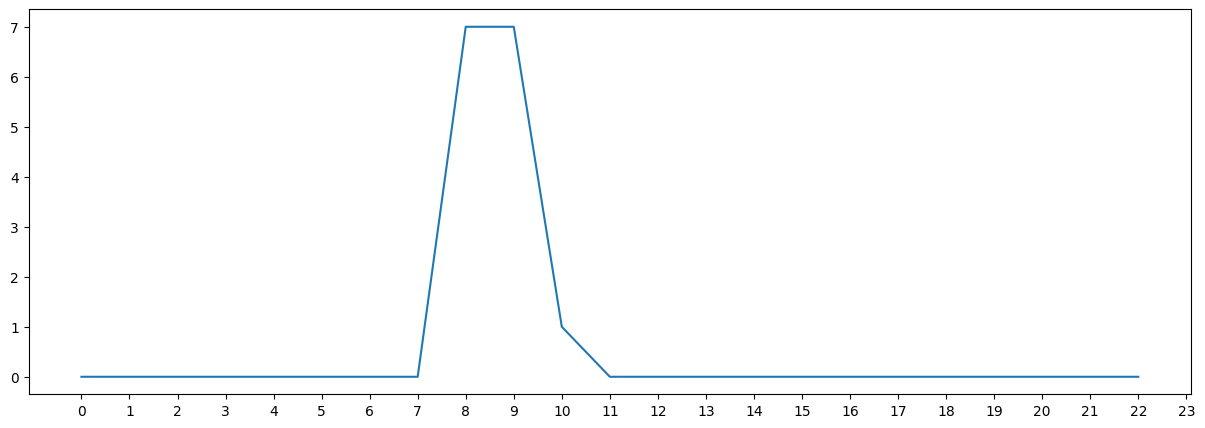

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,5))


plt.xticks(np.arange(0, 32, 1))
plt.plot(score)

This gets input to the number of combos, which can be forced in the box below

In [ ]:
combo_result = 14 #corner+1  #14 # was 8


In [ ]:
# creating a compact combo assignment using the corner, plus all the macs that have not come under the umbrella.
# but under the umbrella is a very fuzzy term so far. Those macs should not have occured in a 2-3 mac combo. Something like that.
# If no 2-3 element combo exists for those macs, then find a combo that does exist, and tag it to the list of combos being worked on.
# Algo : select all two element combos. See if the set of all unique macs is present in any of those combos. If something not present, add as an additional combo to the list

k = combo_result

corner_combos = {'Combo'+str(p):combos['Combo'+str(p)] for p in range(1,k+1)}
additional_combos = {'Combo'+str(p):combos['Combo'+str(p)] for p in range(k,len(combos)) if len(combos['Combo'+str(p)])<3}


print((corner_combos))
print(additional_combos)

unique_devices = list(set([x.split('.')[1] for x in links]))

print('Printing unique devices :',unique_devices)

left_devices = []
for dev in unique_devices:
  pflag = 1
  for ccombos in corner_combos.values():
    for celement in ccombos:
      #print('combos element processed is : ',celement)
      if dev in celement.split('.'):
        #print(dev,'is present')
        pflag = 0
  if pflag==1:
    left_devices.append(dev)

print('Printing devices not found in combos :',left_devices)

combo_num = len(combos)
for i in left_devices:
  flag = False
  for j in combos.keys():
    for elements in combos[j]:
      #print(elements)
      if i in elements.split('.'):
        print(i, 'found in',j)
        corner_combos[j] = combos[j]
        flag = True
    if flag==True:
      break
    if flag==True:
      break




{'Combo1': ['4C72400754.08911552672b'], 'Combo2': ['4C72400754.0007a61e018d'], 'Combo3': ['4C72400754.28ee52a708ca'], 'Combo4': ['4C72400754.68ff7b817f73'], 'Combo5': ['4C72400754.08911552672b', '4C72400754.786c842c48e9'], 'Combo6': ['4C72400754.90f82e864305'], 'Combo7': ['4C72400754.786c845a3054'], 'Combo8': ['4C72400754.0007a61e018d', '4C72400754.08911552672b'], 'Combo9': ['4C72400754.28ee52a70cae'], 'Combo10': ['4C72400754.08911552672b', '4C72400754.786c845a3054'], 'Combo11': ['4C72400754.0007a61e018d', '4C72400754.08911552672b', '4C72400754.28ee52a708ca', '4C72400754.28ee52a70cae', '4C72400754.68ff7b817f73', '4C72400754.786c842c48e9', '4C72400754.786c845a3054', '4C72400754.90f82e864305'], 'Combo12': ['4C72400754.786c842c48e9'], 'Combo13': ['4C72400754.08911552672b', '4C72400754.28ee52a708ca'], 'Combo14': ['4C72400754.0007a61e018d', '4C72400754.786c845a3054']}
{'Combo14': ['4C72400754.0007a61e018d', '4C72400754.786c845a3054'], 'Combo15': ['4C72400754.28ee52a708ca', '4C72400754.28ee5

In [ ]:
print('Links present in order :', links)

print(corner_combos)

print(k)


Links present in order : ['4C72400754.0007a61e018d', '4C72400754.08911552672b', '4C72400754.28ee52a708ca', '4C72400754.28ee52a70cae', '4C72400754.68ff7b817f73', '4C72400754.786c842c48e9', '4C72400754.786c845a3054', '4C72400754.90f82e864305']
{'Combo1': ['4C72400754.08911552672b'], 'Combo2': ['4C72400754.0007a61e018d'], 'Combo3': ['4C72400754.28ee52a708ca'], 'Combo4': ['4C72400754.68ff7b817f73'], 'Combo5': ['4C72400754.08911552672b', '4C72400754.786c842c48e9'], 'Combo6': ['4C72400754.90f82e864305'], 'Combo7': ['4C72400754.786c845a3054'], 'Combo8': ['4C72400754.0007a61e018d', '4C72400754.08911552672b'], 'Combo9': ['4C72400754.28ee52a70cae'], 'Combo10': ['4C72400754.08911552672b', '4C72400754.786c845a3054'], 'Combo11': ['4C72400754.0007a61e018d', '4C72400754.08911552672b', '4C72400754.28ee52a708ca', '4C72400754.28ee52a70cae', '4C72400754.68ff7b817f73', '4C72400754.786c842c48e9', '4C72400754.786c845a3054', '4C72400754.90f82e864305'], 'Combo12': ['4C72400754.786c842c48e9'], 'Combo13': ['4C7

In [ ]:
# we take the new set of combos, and generate a combo list that assigns numbers linearly.
# ie a combo 13 when added to 1-8 is called 9 and so on. wont work, because the token list still has them as 13 .... unless
# you replace the list as follows : replace 9 with nothing, and 13 with 9
# this replacement can happen at pruning time, when all combos not present are removed, and then we can rename 13 with 9
# or ... only remove combos not present in the combo number list, and then count. This way no replacement is needed. In the transition matrix, certain middle rows and columns will be empty. We can remove them.
# find all the combo numbers present. Then arrange them in two lists, one continuous, other non continuous.
# then add 1 to sorted list everytime, to get a combo translation pair, for example 9,13 then 10,14 and so on

# accomplished by pruning the matrix after counting.....

# ToDo: Before the final assignment, remove any items from the list of devices, which do not have 1st or 2nd order combos containing them. This is essential for solver to work, otherwise bad solutions
# can happen. This might require changes to the solver, where the needed devices are being generated to be paired with combos.





In [ ]:
# creating combo to mac assigner using mixed interger prog

from collections import OrderedDict

#k = combo_result
#combos_prep = {'Combo'+str(i):combos['Combo'+str(i)] for i in range(1,k+1)}

combos_prep = OrderedDict()
combos_prep = corner_combos
centers = adapter(combos_prep, links)
# r->results, c->costs, a->assignments, d->devices
#test_matching(centers, links)
r,c,a,d = match_devices(centers, links)
print(a)

# creating combo to devices dictionatry
combo_mac = OrderedDict()
for i in range(len(a)):
  print(a[i])
  combo_mac[d[i]] = str(list(combos_prep)[(a[i][1])])      # Corrected, by using ordered dict, to get the index of the combo with nonlinear intervals between them

print(combo_mac)
print('List of devices',d)

Total cost = 0.0
Device 4C72400754 assigned to cluster center (1, 1, 1, 1, 1, 1, 1, 1). Cost: 0.0
Device 0007a61e018d assigned to cluster center (1, 0, 0, 0, 0, 0, 0, 0). Cost: 0.0
Device 08911552672b assigned to cluster center (0, 1, 0, 0, 0, 0, 0, 0). Cost: 0.0
Device 28ee52a708ca assigned to cluster center (0, 0, 1, 0, 0, 0, 0, 0). Cost: 0.0
Device 28ee52a70cae assigned to cluster center (0, 0, 0, 1, 0, 0, 0, 0). Cost: 0.0
Device 68ff7b817f73 assigned to cluster center (0, 0, 0, 0, 1, 0, 0, 0). Cost: 0.0
Device 786c842c48e9 assigned to cluster center (0, 0, 0, 0, 0, 1, 0, 0). Cost: 0.0
Device 786c845a3054 assigned to cluster center (0, 0, 0, 0, 0, 0, 1, 0). Cost: 0.0
Device 90f82e864305 assigned to cluster center (0, 0, 0, 0, 0, 0, 0, 1). Cost: 0.0

[(0, 10), (1, 1), (2, 0), (3, 2), (4, 8), (5, 3), (6, 11), (7, 6), (8, 5)]
(0, 10)
(1, 1)
(2, 0)
(3, 2)
(4, 8)
(5, 3)
(6, 11)
(7, 6)
(8, 5)
OrderedDict([('4C72400754', 'Combo11'), ('0007a61e018d', 'Combo2'), ('08911552672b', 'Combo1'), (

In [ ]:
#list(combos_prep)[13]

In [ ]:
#combos_prep
print(d)  # this is the order of devices used to form cluster centers

print(combos_prep)

['4C72400754', '0007a61e018d', '08911552672b', '28ee52a708ca', '28ee52a70cae', '68ff7b817f73', '786c842c48e9', '786c845a3054', '90f82e864305']
{'Combo1': ['4C72400754.08911552672b'], 'Combo2': ['4C72400754.0007a61e018d'], 'Combo3': ['4C72400754.28ee52a708ca'], 'Combo4': ['4C72400754.68ff7b817f73'], 'Combo5': ['4C72400754.08911552672b', '4C72400754.786c842c48e9'], 'Combo6': ['4C72400754.90f82e864305'], 'Combo7': ['4C72400754.786c845a3054'], 'Combo8': ['4C72400754.0007a61e018d', '4C72400754.08911552672b'], 'Combo9': ['4C72400754.28ee52a70cae'], 'Combo10': ['4C72400754.08911552672b', '4C72400754.786c845a3054'], 'Combo11': ['4C72400754.0007a61e018d', '4C72400754.08911552672b', '4C72400754.28ee52a708ca', '4C72400754.28ee52a70cae', '4C72400754.68ff7b817f73', '4C72400754.786c842c48e9', '4C72400754.786c845a3054', '4C72400754.90f82e864305'], 'Combo12': ['4C72400754.786c842c48e9'], 'Combo13': ['4C72400754.08911552672b', '4C72400754.28ee52a708ca'], 'Combo14': ['4C72400754.0007a61e018d', '4C724007

In [ ]:
# jig up a new assigner here, Esp for star topologies
# fix it up based on nonlinear combo_list
num_combos2try = combo_result

links = compress_data['topo1']['topology']
link_count  = []
for i in range(len(links)):
  link_count.append(0)

# link frequencies from appearance in combos
for i in range(len(links)):
  for j in range(num_combos2try):
    if links[i] in combo_dict['Combo'+str(j+1)]:
      link_count[i] = link_count[i]+1
      #print(link_count)

#for i in combo_dict:
print(link_count)
print(links)

assign_dict = {}
assigned_links = []
for i in range(num_combos2try):
  if len(combo_dict['Combo'+str(i+1)])==1:
    combo2b = combo_dict['Combo'+str(i+1)]
    #print(combo2b)
    assigned_links.append(combo2b[0])
    assign_dict['Combo'+str(i+1)] = combo2b[0].split('.')[1]

print(assign_dict)
# assuming # of devices > 3
# assigning for two link combos
for i in range(num_combos2try):
  if len(combo_dict['Combo'+str(i+1)])==2:
    combo2b = combo_dict['Combo'+str(i+1)]
    #print(combo2b)
    new_link = set(combo2b) - set(assigned_links)
    #print(new_link, 'extra link')
    # assign the new link, todo
    if len(new_link)>0:
      link2b = list(new_link)
      print(link2b,  'extra link discovered')
      assign_dict['Combo'+str(i+1)] = link2b[0].split('.')[1]
      assigned_links.append(link2b[0])
# assigning for three link combos
for i in range(num_combos2try):
  if len(combo_dict['Combo'+str(i+1)])==3:
    combo2b = combo_dict['Combo'+str(i+1)]
    #print(combo2b)
    new_link = set(combo2b) - set(assigned_links)
    #print(new_link, 'extra link')
    # assign the new link, todo
    if len(new_link)==1:
      link2b = list(new_link)
      print(link2b,  'extra link discovered')
      assign_dict['Combo'+str(i+1)] = link2b[0].split('.')[1]
    # if len(new_link) > 1: use the less weighted link for assignment


# assigning for node
max_len = 0
max_combo =1

for i in range(num_combos2try):
  curr_len = len(combo_dict['Combo'+str(i+1)])
  #print(curr_len)
  #print(i)
  if curr_len>max_len and curr_len>3:
    #print(curr_len)
    max_len = curr_len
    max_combo = i+1


assign_dict['Combo'+str(max_combo)] = combo_dict['Combo'+str(1)][0].split('.')[0]

print(assign_dict)
print(max_combo)

[4, 6, 3, 2, 2, 3, 4, 2]
['4C72400754.0007a61e018d', '4C72400754.08911552672b', '4C72400754.28ee52a708ca', '4C72400754.28ee52a70cae', '4C72400754.68ff7b817f73', '4C72400754.786c842c48e9', '4C72400754.786c845a3054', '4C72400754.90f82e864305']
{'Combo1': '08911552672b', 'Combo2': '0007a61e018d', 'Combo3': '28ee52a708ca', 'Combo4': '68ff7b817f73', 'Combo6': '90f82e864305', 'Combo7': '786c845a3054', 'Combo9': '28ee52a70cae', 'Combo12': '786c842c48e9'}
{'Combo1': '08911552672b', 'Combo2': '0007a61e018d', 'Combo3': '28ee52a708ca', 'Combo4': '68ff7b817f73', 'Combo6': '90f82e864305', 'Combo7': '786c845a3054', 'Combo9': '28ee52a70cae', 'Combo12': '786c842c48e9', 'Combo11': '4C72400754'}
11


In [ ]:
#print(assign_dict)
#print(combo_mac)

combo_list = list(corner_combos)

sel_combo_nums = [int(i.replace('Combo','')) for i in combo_list]

print(sel_combo_nums)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [ ]:

# ToDo : function to change to start working with a nonlinear (non-monotonic) combo list

data1 = compress_data['topo1']['combo_sequence']


# filter the time series using only selected combos
data2 = []
selected_combos = [i for i in sel_combo_nums]  # Replace : have to select combos based on the number from dictionary
for i in data1:
  if i in selected_combos:
    data2.append(i)

print(data2)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 8, 2, 2, 2, 2, 2, 2, 2, 6, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 12, 9, 9, 9, 9, 9, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 7, 7, 2, 2, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 2, 1, 1, 1, 7, 10, 10, 10, 10, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 7, 7, 2, 2, 2, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 2, 2, 2, 2, 2, 2, 4, 4, 10, 10, 10, 10, 10, 7, 7, 7, 7, 7, 11, 11, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 14, 2, 2, 5, 1, 2

In [ ]:

def remove_non_consecutive(tokens):
    # Remove tokens that don't have consecutive occurrences
    # this is to eliminate those one time occurances, which may not be material.
    filtered_tokens = []
    for i in range(len(tokens)):
        current_token = tokens[i]
        if i == 0 or i == 1 or i == len(tokens) - 1 or i == len(tokens) - 2:  # setup a window of 4 vs two tokens
            filtered_tokens.append(current_token)
        else:
            prev_token  = tokens[i - 1]
            prev_token2 = tokens[i - 2]
            next_token  = tokens[i + 1]
            next_token2  = tokens[i + 2]
            if prev_token2 == current_token or next_token2 == current_token:
                filtered_tokens.append(current_token)

    return filtered_tokens

# Function to remove tokens that occur only once, (parametrizable) and then replace many occurances with a single token

def prune_lowincidence_subsequences(tokens):
    result = []
    i = 0
    while i < len(tokens):
        current_token = tokens[i]
        count = 1

        while i + count < len(tokens) and tokens[i + count] == current_token:
            count += 1

        if count > 3:
            result.append(current_token)
        # If the count is 1, the token occurs only once, so we skip adding it to the result.

        i += count

    return result

# Example usage
stream_of_tokens = ['a', 'a', 'b', 'c', 'c', 'c', 'd', 'e', 'e', 'e', 'e']
result = prune_lowincidence_subsequences(stream_of_tokens)
print(result)



['e']




```
# This is formatted as code
```

data3 = remove_non_consecutive(data2)
print(data3)

data4 = prune_lowincidence_subsequences(data2)
print(data4)

In [ ]:
max(sel_combo_nums)

data3 = remove_non_consecutive(data2)
print(data3)

data4 = prune_lowincidence_subsequences(data2)
print(data4)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 1, 10, 10, 10, 10, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 2, 2, 2, 2, 2, 2, 10, 10, 10, 10, 10, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 

In [ ]:
# Example transition matrix creation

data = [3, 0, 1, 3, 2, 6, 5, 4, 7, 5, 4]
n = 11  # (this means there are 8 states in Markov chain from 0 - 7, both inclusive)
step = 1

def compute_transition_matrix(data, n, step = 1):
    P = np.zeros((n, n))
    T = np.zeros((n,n))
    m = len(data)
    for i in range(1,m):
        initial, final = i, i+ step
        if final < m:
            P[data[initial]-1][data[final]-1] += 1 # adjust for Combo1 naming
            T[data[initial]-1][data[final]-1] += 1

    #np.fill_diagonal(P, 2) # to reduce frequency effect
    np.fill_diagonal(P, 0) # to reduce frequency effect
    #np.fill_diagonal(P, np.sum(P, axis=1)) #
    sums = np.sum(P, axis = 1)
    for i in range(n):
        for j in range(n):
            P[i][j] = P[i][j] / sums[i]
            #P[i][j] = P[i][j]
    np.fill_diagonal(P, 0.01) # to reduce frequency effect
    return P,T

#print(compute_transition_matrix([3, 0, 1, 3, 2, 6, 5, 4, 7, 5, 4], 8, 1))

In [ ]:
# Example transition matrix creation with a window

data = [3, 0, 1, 3, 2, 6, 5, 4, 7, 5, 4]
n = 11  # (this means there are 8 states in Markov chain from 0 - 7, both inclusive)
step = 1

def compute_transition_matrix_wwin(data, n, step = 3):
    P = np.zeros((n, n))
    T = np.zeros((n,n))
    m = len(data)
    for i in range(1,m):
      for j in range(1,step):
        initial, final = i, i+j
        if final < m:
            P[data[initial]-1][data[final]-1] += 1 # adjust for Combo1 naming
            T[data[initial]-1][data[final]-1] += 1

    #np.fill_diagonal(P, 2) # to reduce frequency effect
    np.fill_diagonal(P, 0) # to reduce frequency effect
    #np.fill_diagonal(P, np.sum(P, axis=1)) #
    sums = np.sum(P, axis = 1)
    for i in range(n):
        for j in range(n):
            P[i][j] = P[i][j] / sums[i]
            #P[i][j] = P[i][j]
    np.fill_diagonal(P, 0.01) # to reduce frequency effect
    return P,T

#print(compute_transition_matrix([3, 0, 1, 3, 2, 6, 5, 4, 7, 5, 4], 8, 1))

In [ ]:

matrix_size = max(sel_combo_nums)
#tr_mat,count_mat = compute_transition_matrix(data2, matrix_size, step = 1)  # data ingestion, with or without pruning ; default of data2, if requiring low incidence then data 4

tr_mat,count_mat = compute_transition_matrix_wwin(data2, matrix_size, step = 5)

print(count_mat)
print(tr_mat)

M_2_sym = tr_mat


[[14783.   598.   488.   741.  1743.   345.   432.   651.   185.   686.   156.   227.   973.    44.]
 [  594. 11873.   285.   412.   150.   380.   366.   733.   230.    77.   153.   117.    55.   519.]
 [  453.   345. 10086.   222.    58.   173.   104.    25.   371.    22.    39.   170.   356.    28.]
 [  734.   356.   265.  6349.   118.   275.   384.    40.   168.    83.    42.   203.    57.    34.]
 [ 1859.   111.    59.   147.  4350.    27.    47.    85.    19.    98.   104.   521.   136.     9.]
 [  346.   347.   117.   324.    66.  4923.   139.    64.   159.    32.    39.    20.    25.    17.]
 [  430.   369.   148.   337.    67.   133.  2729.    46.    79.   526.    87.    96.    49.   252.]
 [  643.   888.    25.    39.    93.    59.    23.  1829.    17.    49.   133.    14.    53.    43.]
 [  171.   119.   413.   170.    21.   208.    99.    34.  2314.    30.    44.    42.    20.     3.]
 [  643.    88.    32.    75.    83.    27.   524.    51.    38.  1527.   103.    23.    25

In [ ]:
# remove the rows containg any NaN from the matrix
cut_pts = np.argwhere(~np.isnan(tr_mat).any(axis=1))
cut_inds = np.array([i[0] for i in cut_pts])
tr_mat = tr_mat[np.ix_(cut_inds,cut_inds)]
#tr_mat2 = tr_mat[:, ~np.isnan(tr_mat).any(axis=1)]

print(~np.isnan(tr_mat).any(axis=1))


print(cut_inds)
print(tr_mat)

[ True  True  True  True  True  True  True  True  True  True  True  True  True  True]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[[0.01 0.08 0.07 0.1  0.24 0.05 0.06 0.09 0.03 0.09 0.02 0.03 0.13 0.01]
 [0.15 0.01 0.07 0.1  0.04 0.09 0.09 0.18 0.06 0.02 0.04 0.03 0.01 0.13]
 [0.19 0.15 0.01 0.09 0.02 0.07 0.04 0.01 0.16 0.01 0.02 0.07 0.15 0.01]
 [0.27 0.13 0.1  0.01 0.04 0.1  0.14 0.01 0.06 0.03 0.02 0.07 0.02 0.01]
 [0.58 0.03 0.02 0.05 0.01 0.01 0.01 0.03 0.01 0.03 0.03 0.16 0.04 0.  ]
 [0.2  0.2  0.07 0.19 0.04 0.01 0.08 0.04 0.09 0.02 0.02 0.01 0.01 0.01]
 [0.16 0.14 0.06 0.13 0.03 0.05 0.01 0.02 0.03 0.2  0.03 0.04 0.02 0.1 ]
 [0.31 0.43 0.01 0.02 0.04 0.03 0.01 0.01 0.01 0.02 0.06 0.01 0.03 0.02]
 [0.12 0.09 0.3  0.12 0.02 0.15 0.07 0.02 0.01 0.02 0.03 0.03 0.01 0.  ]
 [0.36 0.05 0.02 0.04 0.05 0.02 0.3  0.03 0.02 0.01 0.06 0.01 0.01 0.03]
 [0.08 0.15 0.02 0.05 0.12 0.03 0.07 0.22 0.01 0.07 0.01 0.04 0.02 0.11]
 [0.16 0.05 0.12 0.12 0.38 0.01 0.07 0.01 0.04 0.01 0.01 0.01 0.01 

In [ ]:

use_proxy = 0

matrix_size = max(sel_combo_nums)
tr_mat_prox,count_mat_prox = compute_transition_matrix(data2, matrix_size, step = 1) # proxy to fill up nan entries

#tr_mat[np.isnan(tr_mat)] = tr_mat_prox[np.isnan(tr_mat)]

#print(np.unique(np.argwhere(np.isnan(tr_mat))[0,:]))

#print(tr_mat)

nan_rows = (np.argwhere(np.isnan(tr_mat)))
nan_row_inds=(np.unique(nan_rows[:,0]))

for i in nan_row_inds:
  #print(tr_mat[i,:])
  #print(tr_mat_prox[i,:])
  #print(tr_mat[:,i])
  #print(tr_mat_prox[:,i])
  if use_proxy==1:
    print('Modifying the row and column')
    tr_mat[i,:] = tr_mat_prox[i,:]
    tr_mat[:,i] = tr_mat_prox[:,i]


print(tr_mat)
#print(tr_mat[0][:])

[[0.01 0.08 0.07 0.1  0.24 0.05 0.06 0.09 0.03 0.09 0.02 0.03 0.13 0.01]
 [0.15 0.01 0.07 0.1  0.04 0.09 0.09 0.18 0.06 0.02 0.04 0.03 0.01 0.13]
 [0.19 0.15 0.01 0.09 0.02 0.07 0.04 0.01 0.16 0.01 0.02 0.07 0.15 0.01]
 [0.27 0.13 0.1  0.01 0.04 0.1  0.14 0.01 0.06 0.03 0.02 0.07 0.02 0.01]
 [0.58 0.03 0.02 0.05 0.01 0.01 0.01 0.03 0.01 0.03 0.03 0.16 0.04 0.  ]
 [0.2  0.2  0.07 0.19 0.04 0.01 0.08 0.04 0.09 0.02 0.02 0.01 0.01 0.01]
 [0.16 0.14 0.06 0.13 0.03 0.05 0.01 0.02 0.03 0.2  0.03 0.04 0.02 0.1 ]
 [0.31 0.43 0.01 0.02 0.04 0.03 0.01 0.01 0.01 0.02 0.06 0.01 0.03 0.02]
 [0.12 0.09 0.3  0.12 0.02 0.15 0.07 0.02 0.01 0.02 0.03 0.03 0.01 0.  ]
 [0.36 0.05 0.02 0.04 0.05 0.02 0.3  0.03 0.02 0.01 0.06 0.01 0.01 0.03]
 [0.08 0.15 0.02 0.05 0.12 0.03 0.07 0.22 0.01 0.07 0.01 0.04 0.02 0.11]
 [0.16 0.05 0.12 0.12 0.38 0.01 0.07 0.01 0.04 0.01 0.01 0.01 0.01 0.  ]
 [0.58 0.03 0.18 0.02 0.06 0.01 0.02 0.04 0.01 0.01 0.02 0.01 0.01 0.  ]
 [0.03 0.5  0.02 0.01 0.02 0.01 0.25 0.02 0.01 0.05

<BarContainer object of 14 artists>

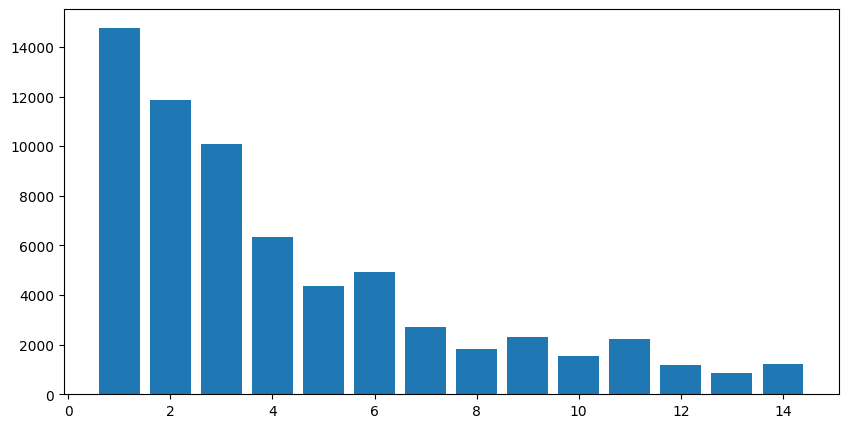

In [ ]:
#np.diag(count_mat)
plt.figure(figsize=(10,5))
plt.bar(range(1,len(count_mat)+1),np.diag(count_mat))

In [ ]:

# Use the probability matrix, and run markov chains over it,
# to convert it into a distance between the nodes

from numpy import inf
import copy

markov_matn = tr_mat

mat_dim = len(markov_matn) # len(data[0].items())
M_2 = np.zeros((mat_dim,mat_dim))
for k in range(mat_dim):
    # loop for setting start node
    a = np.zeros(mat_dim) #np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    a[k]=1
    a_evolve = []
    a_evolve1 = []
    a_step = copy.deepcopy(a)
    for i in range(30):
        #a_step = a_step.dot(markov_matn) # just propagation
        lambda1 = 0.7
        a_step = (a*lambda1) + ((1-lambda1)*a_step.dot((markov_matn))) # flippping to the start+propagation
        a_step = a_step/sum(a_step)
        #print(a)
        #print(a_step)

    a_step[k]=0
    #print(a_step)
    M_2[k][:]= copy.deepcopy(1/a_step)
    M_2[k][k] = 1

#print(M_2)

<ipython-input-43-0e2ead164d79>:28: RuntimeWarning: divide by zero encountered in divide
  M_2[k][:]= copy.deepcopy(1/a_step)


In [ ]:
M_2_sym = M_2 + np.transpose(M_2)
print(np.round(M_2_sym))

[[  2.  58.  67.  50.  25.  90.  72.  56. 139.  54. 163. 104.  39. 310.]
 [ 58.   2.  75.  63. 131.  61.  63.  34.  99. 162. 112. 161. 203.  43.]
 [ 67.  75.   2.  74. 168.  95. 121. 247.  42. 272. 280.  89.  52. 306.]
 [ 50.  63.  74.   2. 112.  60.  58. 203.  89. 145. 235.  84. 191. 264.]
 [ 25. 131. 168. 112.   2. 241. 183. 142. 334. 137. 142.  39. 105. 539.]
 [ 90.  61.  95.  60. 241.   2. 107. 162.  70. 248. 230. 307. 300. 305.]
 [ 72.  63. 121.  58. 183. 107.   2. 214. 146.  37. 143. 140. 227.  60.]
 [ 56.  34. 247. 203. 142. 162. 214.   2. 291. 193.  81. 344. 167. 191.]
 [139.  99.  42.  89. 334.  70. 146. 291.   2. 251. 288. 184. 256. 471.]
 [ 54. 162. 272. 145. 137. 248.  37. 193. 251.   2. 123. 290. 252. 164.]
 [163. 112. 280. 235. 142. 230. 143.  81. 288. 123.   2. 303. 269.  88.]
 [104. 161.  89.  84.  39. 307. 140. 344. 184. 290. 303.   2. 309. 635.]
 [ 39. 203.  52. 191. 105. 300. 227. 167. 256. 252. 269. 309.   2. 726.]
 [310.  43. 306. 264. 539. 305.  60. 191. 471. 164.

In [ ]:
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding

import warnings
warnings.filterwarnings('ignore')


#methods['LLE'] = LLE(method='standard')
#methods['LTSA'] = LLE(method='ltsa')
#methods['Hessian LLE'] = LLE(method='hessian')
##methods['Modified LLE'] = LLE(method='modified')
#methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
#methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
#methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
#                                           n_neighbors=n_neighbors)
#methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
#                                 random_state=0)


#mds = MDS(2,metric=False, random_state=7,dissimilarity='precomputed',normalized_stress=True,n_init=20) # produces stress of 0,21
#mds = MDS(2,metric=False, random_state=3,dissimilarity='precomputed',normalized_stress=True,n_init=50,eps=0.0001)
mds = MDS(2,metric=True, random_state=0,dissimilarity='precomputed')

X_2d = mds.fit_transform((M_2_sym))  # trying anothor distance type

#embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=3)
#embedding = SpectralEmbedding(n_components=2,n_neighbors=3)

embedding = Isomap(n_components=2, n_neighbors=3)
#X_2d = embedding.fit_transform((M_2_sym))
#X_2d = embedding.fit_transform((tr_mat))

In [ ]:
mds.stress_

448722.82835640025

In [ ]:
# preparing a dictionary of nodes
from collections import OrderedDict
node_dict=OrderedDict()
node_labels = OrderedDict()

use_assign_dict = 0
#

mac_combo = {v: k for k, v in combo_mac.items()}

len_data = X_2d.shape[0] #len(data_transition.keys())
for i in range(len_data):
    #print(i)
    comboname='Combo'+str(sel_combo_nums[i])   #
    print(comboname)
    combo_loc = compress_data['topo1']['transition_info']['Combo'+str(i+1)]['location']
    #print(combo_loc)
    node_dict[comboname]=X_2d[i]
    #node_labels['Combo'+str(i+1)]= '\n\n'+combo_loc.split(':')[0] # changing to new assign dict
    if comboname in assign_dict and use_assign_dict==1: # and len(assign_dict.keys())<5:
      node_labels[comboname] = '\n\n'+assign_dict[comboname]
      print('assigning from assign dict')
    elif comboname in mac_combo:
      node_labels[comboname] = '\n\n'+mac_combo[comboname]
      print('assigning from mac_combo')
    else:
      pass

Combo1
assigning from mac_combo
Combo2
assigning from mac_combo
Combo3
assigning from mac_combo
Combo4
assigning from mac_combo
Combo5
Combo6
assigning from mac_combo
Combo7
assigning from mac_combo
Combo8
Combo9
assigning from mac_combo
Combo10
Combo11
assigning from mac_combo
Combo12
assigning from mac_combo
Combo13
Combo14


In [ ]:
node_labels

#print(assign_dict)

OrderedDict([('Combo1', '\n\n08911552672b'),
             ('Combo2', '\n\n0007a61e018d'),
             ('Combo3', '\n\n28ee52a708ca'),
             ('Combo4', '\n\n68ff7b817f73'),
             ('Combo6', '\n\n90f82e864305'),
             ('Combo7', '\n\n786c845a3054'),
             ('Combo9', '\n\n28ee52a70cae'),
             ('Combo11', '\n\n4C72400754'),
             ('Combo12', '\n\n786c842c48e9')])

In [ ]:
#mds.n_iter_
mds.n_features_in_

14

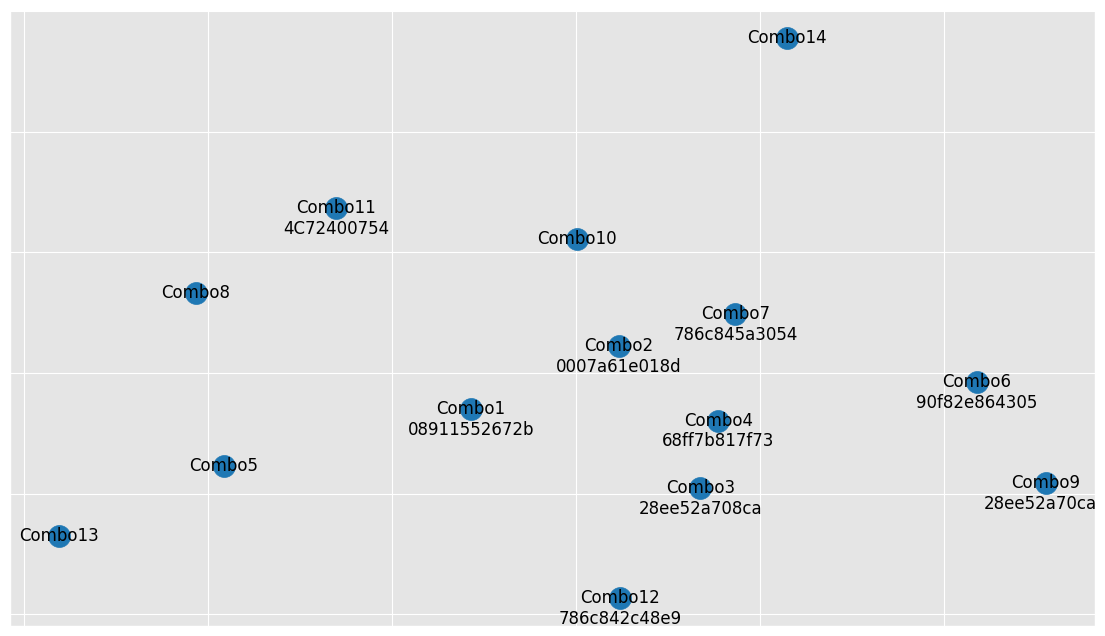

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


X = nx.Graph()
X.add_nodes_from(node_dict.keys())


'''
['fivethirtyeight',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'ggplot',
 'grayscale']
 https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
'''
plt.style.use('ggplot')
plt.figure(figsize=(14,8))

#T = nx.minimum_spanning_tree(X)
nx.draw_networkx(X, node_dict, node_labels, node_size = 250, width=3, edge_color = 'grey')
nx.draw_networkx_labels(X, node_dict,node_labels)
#nx.draw(T, node_dict, with_labels = True)
plt.show()

In [ ]:
#import map_star as mapstar
#mapstar.map_make_startopo(compress_data)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=5)
clustering.fit(X_2d)
clustering.labels_

array([0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 4, 2, 3])

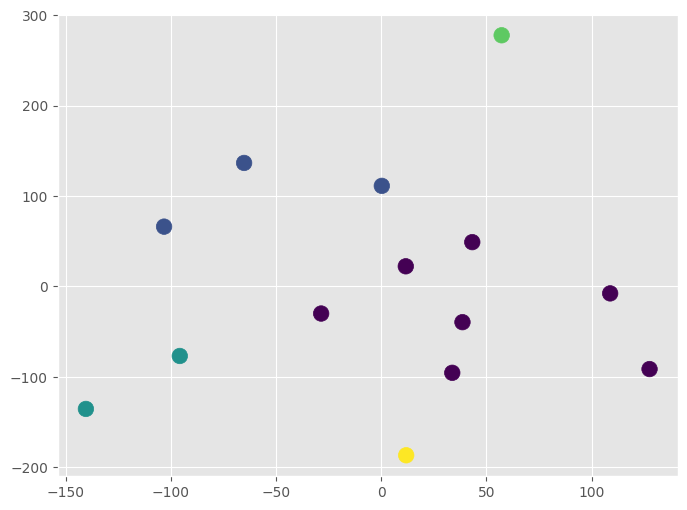

In [ ]:
x, y = X_2d.T
plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.scatter(x, y, s=125, c=clustering.labels_.astype(float))
plt.show()

In [ ]:
node_labels

OrderedDict([('Combo1', '\n\n08911552672b'),
             ('Combo2', '\n\n0007a61e018d'),
             ('Combo3', '\n\n28ee52a708ca'),
             ('Combo4', '\n\n68ff7b817f73'),
             ('Combo6', '\n\n90f82e864305'),
             ('Combo7', '\n\n786c845a3054'),
             ('Combo9', '\n\n28ee52a70cae'),
             ('Combo11', '\n\n4C72400754'),
             ('Combo12', '\n\n786c842c48e9')])

In [ ]:
combo_mac

OrderedDict([('4C72400754', 'Combo11'),
             ('0007a61e018d', 'Combo2'),
             ('08911552672b', 'Combo1'),
             ('28ee52a708ca', 'Combo3'),
             ('28ee52a70cae', 'Combo9'),
             ('68ff7b817f73', 'Combo4'),
             ('786c842c48e9', 'Combo12'),
             ('786c845a3054', 'Combo7'),
             ('90f82e864305', 'Combo6')])

In [ ]:
# generating labels for nodes in the x-y scatter plot
text_list = []

mac_combo = {v: k for k, v in combo_mac.items()}

for i in sel_combo_nums:
  if len(assign_dict.keys())<5:
    if 'Combo'+str(i) not in assign_dict and use_assign_dict==1:
      text_list.append('signa'+str(i))
    else:
      text_list.append('signa'+str(i)+':'+'\n'+assign_dict['Combo'+str(i)])
  else:
    if 'Combo'+str(i) not in mac_combo:
      text_list.append('signa'+str(i))
    else:
      text_list.append('signa'+str(i)+':'+'\n'+mac_combo['Combo'+str(i)])


In [ ]:
text_list

['signa1:\n08911552672b',
 'signa2:\n0007a61e018d',
 'signa3:\n28ee52a708ca',
 'signa4:\n68ff7b817f73',
 'signa5',
 'signa6:\n90f82e864305',
 'signa7:\n786c845a3054',
 'signa8',
 'signa9:\n28ee52a70cae',
 'signa10',
 'signa11:\n4C72400754',
 'signa12:\n786c842c48e9',
 'signa13',
 'signa14']

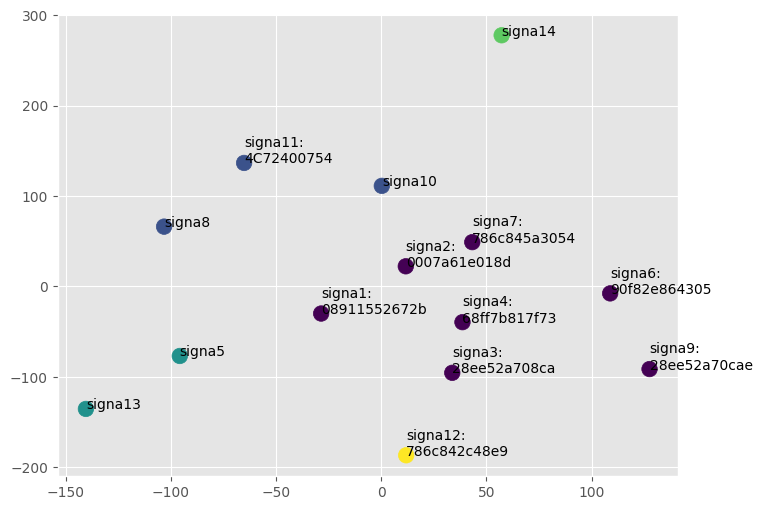

In [ ]:
x, y = X_2d.T
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x, y, s=125, c=clustering.labels_.astype(float))
for i, txt in enumerate(text_list):
  ax.annotate(txt, (x[i], y[i]))


plt.show()

In [ ]:
text_list


['signa1:\n08911552672b',
 'signa2:\n0007a61e018d',
 'signa3:\n28ee52a708ca',
 'signa4:\n68ff7b817f73',
 'signa5',
 'signa6:\n90f82e864305',
 'signa7:\n786c845a3054',
 'signa8',
 'signa9:\n28ee52a70cae',
 'signa10',
 'signa11:\n4C72400754',
 'signa12:\n786c842c48e9',
 'signa13',
 'signa14']

This is to be drawn
This is to be drawn
This is to be drawn
This is to be drawn
This is to be drawn
This is to be drawn
This is to be drawn
This is to be drawn
This is to be drawn


<Figure size 640x480 with 0 Axes>

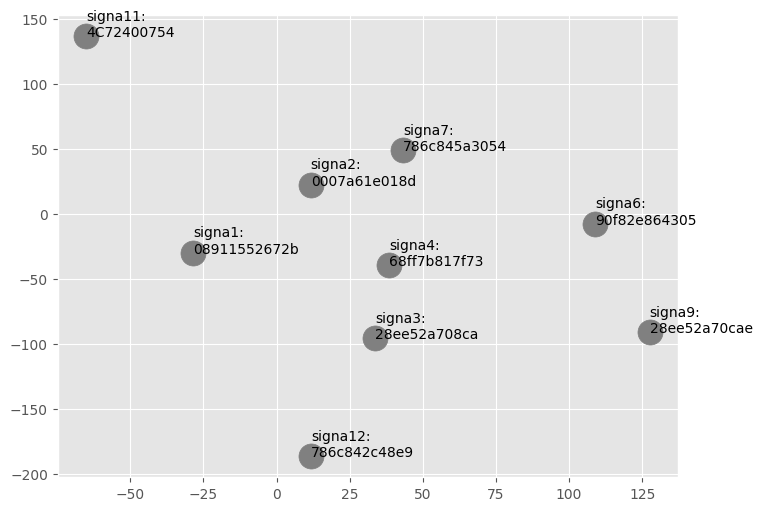

In [ ]:
plt.figure()
x, y = X_2d.T
fig, ax = plt.subplots(figsize=(8,6))
#ax.scatter(x, y, s=125, c=clustering.labels_.astype(float))
for i, txt in enumerate(text_list):
  if clustering.labels_[i] == 0:
    color = 'magenta'
  elif clustering.labels_[i] == 1:
    color = 'red'
  elif clustering.labels_[i] == 2:
    color = 'green'
  elif clustering.labels_[i] == 3:
    color = 'purple'
  elif clustering.labels_[i] == 4:
    color = 'brown'
  if 'CP' in txt:
    print('This is to be drawn')
    ax.scatter(x[i],y[i], s=625, c=color)
    ax.annotate(txt, (x[i], y[i]))
  color = 'grey'
  if ':' in txt:
    print('This is to be drawn')
    ax.scatter(x[i],y[i], s=325, c=color)
    ax.annotate(txt, (x[i], y[i]))


**END MAIN CODE**

-- Look at corner selector. Its making erros on the corner. Solution : figure out the two corners where most of hte reduction occurs, then select a mid point between the two corners.



Things to do : 1) run the assigner with both MIP and custom, and see when they converge to each other. Right now, 18 is when they match. That could be the optimum
2) run the MDS for its error and see which numbers gives the lowest error. Right now its 14.
3) What if I only select combos that have been selected by the assigner, and let everything else fall away

In [ ]:
####  New code for mecator testing specific mappings  ####

# Specific to a system
# generating labels for nodes in the x-y scatter plot

text_list = []
for i in range(combo_result):
  if 'Combo'+str(i+1) not in mac_combo:
    text_list.append('signa'+str(i+1))
  else:
    if '0007' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' Dev 7')
    elif '0891' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' Dev 1')
    elif '28ee' in mac_combo['Combo'+str(i+1)] and '08ca' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' Dev 8')
    elif '90f8' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' Dev 5')
    elif '68ff' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' Dev 4')
    elif '28ee' in mac_combo['Combo'+str(i+1)] and 'cae' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' Dev 2')
    elif '786' in mac_combo['Combo'+str(i+1)] and '8e9' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' Dev 3')
    elif '786' in mac_combo['Combo'+str(i+1)] and '054' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' Dev 6')
    elif '4C72' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' AP')
    else:
      pass

print(text_list)


[' Dev 1', ' Dev 7', ' Dev 8', ' Dev 4', 'signa5', ' Dev 5', ' Dev 6', 'signa8', ' Dev 2', 'signa10', ' AP', ' Dev 3', 'signa13', 'signa14']


Device specific code

<Figure size 640x480 with 0 Axes>

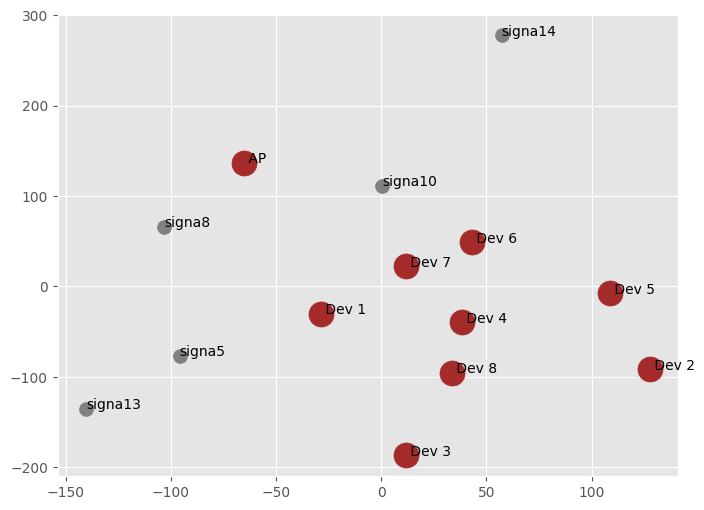

In [ ]:
plt.figure()
x, y = X_2d.T
fig, ax = plt.subplots(figsize=(8,6))
#ax.scatter(x, y, s=125, c=clustering.labels_.astype(float))
for i, txt in enumerate(text_list):
  '''
  if clustering.labels_[i] == 0:
    color = 'magenta'
  elif clustering.labels_[i] == 1:
    color = 'red'
  elif clustering.labels_[i] == 2:
    color = 'green'
  elif clustering.labels_[i] == 3:
    color = 'purple'
  elif clustering.labels_[i] == 4:
    color = 'brown'
  if 'CP' in txt:
    print('This is to be drawn')
    ax.scatter(x[i],y[i], s=625, c=color)
    ax.annotate(txt, (x[i], y[i]))
  color = 'grey'
  if 'signa10' in txt:
    continue
    '''
  color = 'green'
  if 'signa' in txt:
    #print('This is to be drawn')
    color = 'grey'
    ax.scatter(x[i],y[i], s=100, c=color)
    ax.annotate(txt, (x[i], y[i]))
  else:
    color = 'brown'
    ax.scatter(x[i],y[i], s=325, c=color)
    ax.annotate(txt, (x[i], y[i]))

In [ ]:
# Ending code for Custom drawings. Optimization starts below for different objective functions

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
# distance between rows of X
E = euclidean_distances(X_2d, X_2d)

#print(E)

print([14,[1,5,10]])   # subtract one from all combos numbers

print(np.sum(E[2,[10,5,1]]))
print(np.sum(E[8,[10,5,1]]))
print(np.sum(E[11,[10,5,1]]))

[14, [1, 5, 10]]
504.16275673159635
618.5317826967768
890.3063980313992


In [ ]:
# Closest combos
print(E[21,[0,4,1]])   # subtract one from all combos numbers

[0.57 0.85 0.46]


In [ ]:
#@title Device specific
# Specific to a system
# generating labels for nodes in the x-y scatter plot

text_list = []
for i in range(combo_result):
  if 'Combo'+str(i+1) not in mac_combo:
    text_list.append('signa'+str(i+1))
  else:
    if 'c8f' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' MBa')
    elif '920' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' KC')
    elif 'e4f0' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' R4')
    elif 'd88c' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' MBb')
    elif 'ac67' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' R2a')
    elif 'ccf7' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' R2b')
    elif '689' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' BALC')
    elif '8b4' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' ENT')
    elif 'B8C' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' AP')
    elif '83f' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' LVNG')
    elif 'c46f' in mac_combo['Combo'+str(i+1)]:
      text_list.append(' 10')
    else:
      pass

print(text_list)

['signa4', 'signa6', 'signa7', 'signa9', 'signa11', 'signa12', 'signa13', 'signa15', 'signa16', 'signa17', 'signa18', 'signa20', 'signa21', 'signa22']


mac_combo

In [ ]:
# creating new similarity : Use ranks, rank everything and use the rank, as a signal
# consider which two devices occur in combos together. Number of combos is the similarity measure
# If you occur in a combo, much lower in frequency, you get a damping. So damp occurences with frequencies
# If you occur a lot by yourself, (possible also due to multipath), you can use transitions as additional measure (how ??)

signa1
 BALC
 ENT
 AP
signa5
 R2a
 LVNG
 KC
 R4
 10
 R2b
 MBb
 MBa
signa14


<Figure size 640x480 with 0 Axes>

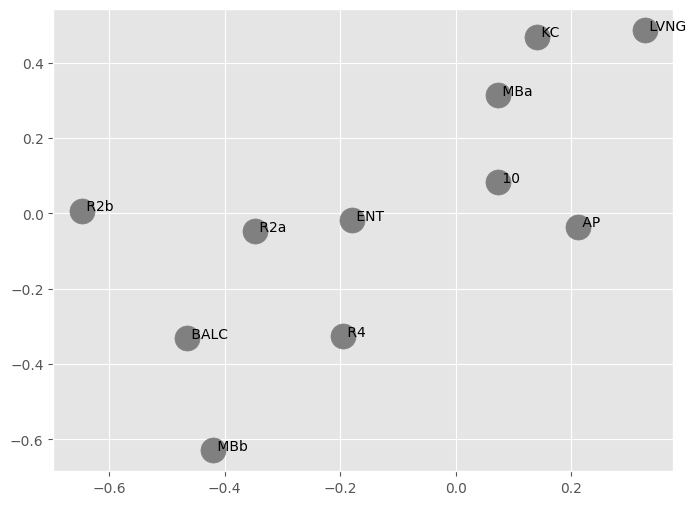

In [ ]:

plt.figure()
x, y = X_2d.T
fig, ax = plt.subplots(figsize=(8,6))
#ax.scatter(x, y, s=125, c=clustering.labels_.astype(float))
for i, txt in enumerate(text_list):
  if clustering.labels_[i] == 0:
    color = 'magenta'
  elif clustering.labels_[i] == 1:
    color = 'red'
  elif clustering.labels_[i] == 2:
    color = 'green'
  elif clustering.labels_[i] == 3:
    color = 'purple'
  elif clustering.labels_[i] == 4:
    color = 'brown'
  if 'CP' in txt:
    print('This is to be drawn')
    ax.scatter(x[i],y[i], s=625, c=color)
    ax.annotate(txt, (x[i], y[i]))
  color = 'grey'
  if 'signa10' in txt:
    continue
  print(txt)
  if 'signa' not in txt:
    #print('This is to be drawn')
    ax.scatter(x[i],y[i], s=325, c=color)
    ax.annotate(txt, (x[i], y[i]))

In [ ]:
# Rotating points across a given point

def rotate(p, origin=(0, 0), degrees=0):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)


points=[(200, 300), (100, 300)]
origin=(100,100)

#new_points = rotate(points, origin=origin, degrees=10)
#print(new_points)

new_points = rotate(X_2d, origin=origin, degrees=-90)
print(new_points)

[[  0.13 199.68]
 [ -0.33 200.47]
 [ -0.02 200.18]
 [ -0.03 199.79]
 [  0.08 199.59]
 [ -0.05 200.35]
 [  0.49 199.67]
 [  0.47 199.86]
 [ -0.33 200.19]
 [  0.08 199.93]
 [  0.01 200.65]
 [ -0.63 200.42]
 [  0.31 199.93]
 [ -0.2  199.25]]


In [ ]:
def reflect_points(points, axis):
    reflected_points = []

    if axis.lower() == 'x':
        for point in points:
            reflected_point = (point[0], -point[1])
            reflected_points.append(reflected_point)
    elif axis.lower() == 'y':
        for point in points:
            reflected_point = (-point[0], point[1])
            reflected_points.append(reflected_point)
    else:
        print("Invalid axis. Please enter 'x' or 'y'.")

    return np.array(reflected_points)

    #return reflected_points

points = [(1, 2), (3, 4), (5, 6)]

new_points2 = reflect_points(new_points,'y')

print(new_points2)

[[ -0.13 199.68]
 [  0.33 200.47]
 [  0.02 200.18]
 [  0.03 199.79]
 [ -0.08 199.59]
 [  0.05 200.35]
 [ -0.49 199.67]
 [ -0.47 199.86]
 [  0.33 200.19]
 [ -0.08 199.93]
 [ -0.01 200.65]
 [  0.63 200.42]
 [ -0.31 199.93]
 [  0.2  199.25]]


signa1
 BALC
 ENT
 AP
signa5
 R2a
 LVNG
 KC
 R4
 10
 R2b
 MBb
 MBa
signa14


<Figure size 640x480 with 0 Axes>

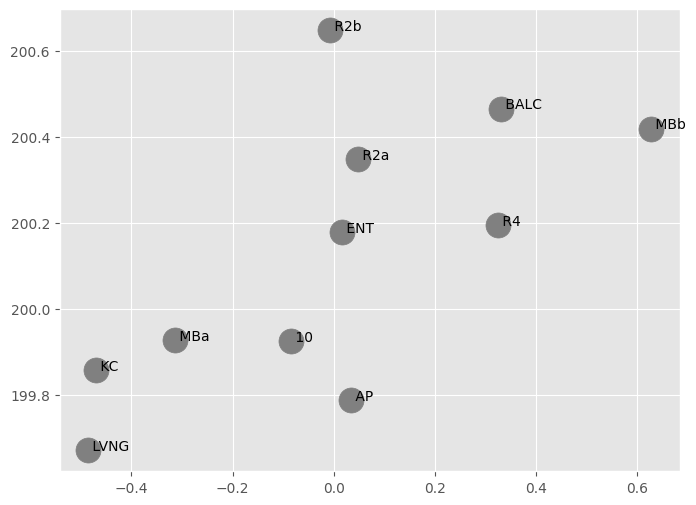

In [ ]:
plt.figure()
x, y = X_2d.T
x, y = new_points2.T
fig, ax = plt.subplots(figsize=(8,6))
#ax.scatter(x, y, s=125, c=clustering.labels_.astype(float))
for i, txt in enumerate(text_list):
  if clustering.labels_[i] == 0:
    color = 'magenta'
  elif clustering.labels_[i] == 1:
    color = 'red'
  elif clustering.labels_[i] == 2:
    color = 'green'
  elif clustering.labels_[i] == 3:
    color = 'purple'
  elif clustering.labels_[i] == 4:
    color = 'brown'
  if 'CP' in txt:
    print('This is to be drawn')
    ax.scatter(x[i],y[i], s=625, c=color)
    ax.annotate(txt, (x[i], y[i]))
  color = 'grey'
  if 'signa10' in txt:
    continue
  print(txt)
  if 'signa' not in txt:
    #print('This is to be drawn')
    ax.scatter(x[i],y[i], s=325, c=color)
    ax.annotate(txt, (x[i], y[i]))

In [ ]:
new_points3 = rotate(new_points2, origin=(0,200.2), degrees=-45)

signa1
 BALC
 ENT
 AP
signa5
 R2a
 LVNG
 KC
 R4
 10
 R2b
 MBb
 MBa
signa14


<Figure size 640x480 with 0 Axes>

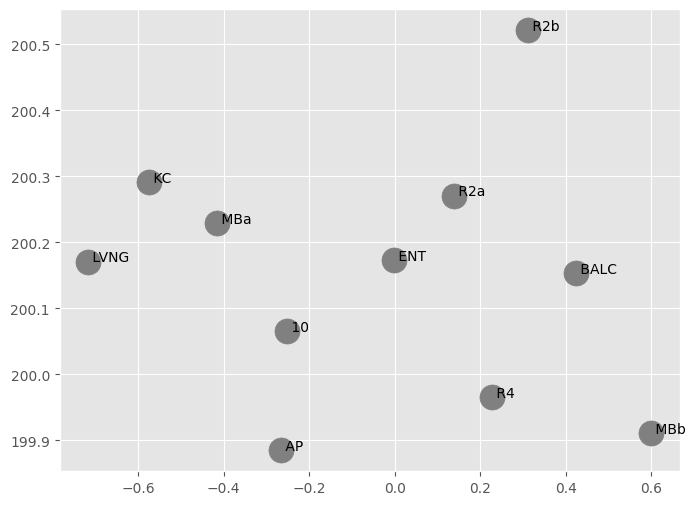

In [ ]:
plt.figure()
x, y = X_2d.T
x, y = new_points3.T
fig, ax = plt.subplots(figsize=(8,6))
#ax.scatter(x, y, s=125, c=clustering.labels_.astype(float))
for i, txt in enumerate(text_list):
  if clustering.labels_[i] == 0:
    color = 'magenta'
  elif clustering.labels_[i] == 1:
    color = 'red'
  elif clustering.labels_[i] == 2:
    color = 'green'
  elif clustering.labels_[i] == 3:
    color = 'purple'
  elif clustering.labels_[i] == 4:
    color = 'brown'
  if 'CP' in txt:
    print('This is to be drawn')
    ax.scatter(x[i],y[i], s=625, c=color)
    ax.annotate(txt, (x[i], y[i]))
  color = 'grey'
  if 'signa10' in txt:
    continue
  print(txt)
  if 'signa' not in txt:
    #print('This is to be drawn')
    ax.scatter(x[i],y[i], s=325, c=color)
    ax.annotate(txt, (x[i], y[i]))

In [ ]:
compress_data['topo1'].keys()

dict_keys(['topology', 'combo_occurrence', 'transition_info', 'combo_sequence', 'time_sequence', 'rssi_sequence', 'lraw_sequence', 'mconf_sequence', 'mkai_sequence', 'msad_sequence', 'snr_sequence', 'throughput_sequence'])

In [ ]:
compress_data['topo1']['rssi_sequence'].keys()

dict_keys(['4Y7D3003B6.1aa6f745a146', '4Y7D3003B6.1c4d668573c4', '4Y7D3003B6.7c6166e32f62', '4Y7D3003B6.909a4a4650a6', '4Y7D3003B6.909a4a4650a7', '4Y7D3003B6.a47733af04bf', '4Y7D3003B6.b0be761e3448'])

In [ ]:
compress_data['topo1']['mkai_sequence'].keys()

dict_keys(['4Y7D3003B6.1aa6f745a146', '4Y7D3003B6.1c4d668573c4', '4Y7D3003B6.7c6166e32f62', '4Y7D3003B6.909a4a4650a6', '4Y7D3003B6.909a4a4650a7', '4Y7D3003B6.a47733af04bf', '4Y7D3003B6.b0be761e3448'])

In [ ]:
np.mean(compress_data['topo1']['mkai_sequence']['4Y7D3003B6.1aa6f745a146'])

1.5825061142281683e-05

In [ ]:
# find indices of certain combos, and then compute the motion present in the links of those combos. The motion is a measure of belonging-ness of a device to that combo.
#